In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
ranks = {}
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [3]:
df = pd.read_csv("../datasets/USA_houseprices_2014/preprocessed_data_USAhouseprices2014.csv")
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,year_since_1st_renovation,city,statezip,have_basement,price
0,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.000000,0.921053,0.837209,0.815789,False,313000.0
1,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.058091,0.184211,0.813953,0.763158,True,2384000.0
2,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,0.578947,0.418605,0.342105,False,342000.0
3,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,0.552632,0.069767,0.092105,True,420000.0
4,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,0.807018,0.720930,0.407895,True,550000.0


In [4]:
# df = df.drop(['Unnamed: 0'], axis=1)
# df = df.drop(['have_basement'], axis=1)
# df

In [5]:
X = df.copy()
y = X.pop("price")
colnames = X.columns

In [6]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

Feature: 0, Score: 0.00655
Feature: 1, Score: 0.11207
Feature: 2, Score: 0.23471
Feature: 3, Score: 0.12916
Feature: 4, Score: 0.00472
Feature: 5, Score: 0.02076
Feature: 6, Score: 0.01193
Feature: 7, Score: 0.35865
Feature: 8, Score: 0.00915
Feature: 9, Score: 0.01685
Feature: 10, Score: 0.03347
Feature: 11, Score: 0.06123
Feature: 12, Score: 0.00075


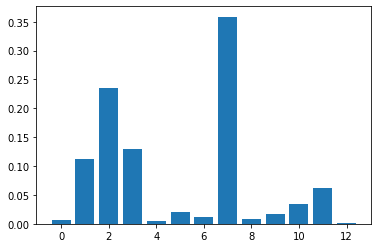

In [7]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [8]:
cart = DecisionTreeRegressor()
cart.fit(X,y)
ranks["CART"] = ranking(cart.feature_importances_, colnames);
ranks

{'CART': {'bedrooms': 0.02,
  'bathrooms': 0.31,
  'sqft_living': 0.65,
  'sqft_lot': 0.21,
  'floors': 0.01,
  'waterfront': 0.05,
  'view': 0.03,
  'condition': 1.0,
  'sqft_basement': 0.03,
  'year_since_1st_renovation': 0.05,
  'city': 0.09,
  'statezip': 0.33,
  'have_basement': 0.0}}

In [9]:
decimalrank_df = pd.DataFrame()

# Join preranks in dataframe
for method_name, rank_list in ranks.items():
    df_Temp = pd.DataFrame(data = {method_name:pd.Series(rank_list)})
    decimalrank_df = pd.concat([decimalrank_df,df_Temp ], axis=1)

rank_df = pd.DataFrame()
# Create new integer ranks
for method_name, rank_list in ranks.items():
    rank_df[method_name] = decimalrank_df[method_name].rank(ascending=False)

rank_df['feature_name'] = rank_df.index

In [10]:
ranksout = rank_df.melt(id_vars = 'feature_name', var_name='method', value_name='feature_rank')
ranksout['dataset'] = 'USA_houseprices_2014'
ranksout

,feature_name,method,feature_rank,dataset
0,bedrooms,CART,11.0,USA_houseprices_2014
1,bathrooms,CART,4.0,USA_houseprices_2014
2,sqft_living,CART,2.0,USA_houseprices_2014
3,sqft_lot,CART,5.0,USA_houseprices_2014
4,floors,CART,12.0,USA_houseprices_2014
5,waterfront,CART,7.5,USA_houseprices_2014
6,view,CART,9.5,USA_houseprices_2014
7,condition,CART,1.0,USA_houseprices_2014
8,sqft_basement,CART,9.5,USA_houseprices_2014
9,year_since_1st_renovation,CART,7.5,USA_houseprices_2014


In [11]:
ranksout.to_csv('../data/CART/USA_houseprices_2014.csv', sep=';',index=False)